[[0. 2. 4. ... 0. 2. 4.]
 [2. 0. 2. ... 2. 0. 2.]
 [4. 2. 0. ... 4. 2. 0.]
 ...
 [0. 2. 4. ... 0. 2. 4.]
 [2. 0. 2. ... 2. 0. 2.]
 [4. 2. 0. ... 4. 2. 0.]]


/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


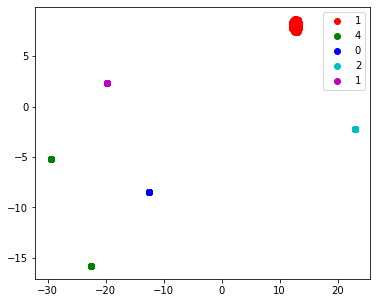

In [3]:
import pandas as pd
import numpy as np

url = 'https://raw.githubusercontent.com/ISwifton/Clustering-of-sociological-data/main/data_job.csv'
jobs_rawdata=pd.read_csv(url)
jobs=jobs_rawdata.to_numpy()

dim = len(jobs)
Jobs_final=np.zeros((dim,dim))

# Compute pairwise distance matrix (Job)
for i in range(dim):
  for j in range(dim):
   Jobs_final[i][j]=(sum(abs(jobs[i]-jobs[j])))

print(Jobs_final)

# Make clustering
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
Jobs_tsne = TSNE(n_components=2, random_state=0)
Jobs_kmns = KMeans(n_clusters=5).fit(Jobs_final)

Jobs_2d = Jobs_tsne.fit_transform(Jobs_final)
Jobs_y=Jobs_kmns.labels_

Jobs_target_ids = range(len(Jobs_y))

# Visualize clustering
from matplotlib import pyplot as plt
plt.figure(figsize=(6, 5))
Jobs_colors = 'r', 'g', 'b', 'c', 'm'
for Jobs_i, Jobs_c, Jobs_label in zip(Jobs_target_ids, Jobs_colors, Jobs_y):
    plt.scatter(Jobs_2d[Jobs_y == Jobs_i, 0], Jobs_2d[Jobs_y == Jobs_i, 1], c=Jobs_c, label=Jobs_label)
plt.legend()
plt.show()